In [33]:
import matplotlib.pyplot as plt

<h1> Programming for Physics <br> Lecture 11: Modules </h1>
<a target="_blank" href="https://colab.research.google.com/github/slxuphys/tamu_phys_150/blob/master/lecture/lecture%2011%20Module.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

![image](https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/course_logo.png?raw=true)

# Modules

A wrapper of functions, constants and classes


__The reusability of the code__

Never repeat yourself!

---

## Import module
- import the module
    ```python
    import module_name
    ```
- access the module content by 
    ```python
    module_name.variable_name
    module_name.function_name
    module_name.class_name
    ```


In [2]:
import numpy ##numpy is the module name
numpy

<module 'numpy' from 'c:\\Users\\Public\\anaconda\\Lib\\site-packages\\numpy\\__init__.py'>

In [11]:
numpy.pi #variable

3.141592653589793

In [3]:
numpy.sin #function

<ufunc 'sin'>

In [13]:
numpy.ndarray  #class

numpy.ndarray

- give the module an alias if the module name is too long.
    ```python
    import module_name as nickname
    ```


In [15]:
import numpy as np
np.pi

3.141592653589793

In [18]:
np.array

<function numpy.array>

---

## Import specific content from a module
Sometimes we do not need everything from the module but only a specific function or a specific variable.

```python
from module_name import function_name 
from module_name import variable_name
```
Then you can use the function or variable by their names without the module name.

In [19]:
from numpy import pi
print(pi)

3.141592653589793


---

## Custom module 

We can also make a module ourselves and put useful functions and variables there.

A module is essentially a Python file (with a .py extension) that contains Python code (functions, classes, variables, etc.). The file name becomes the module name when importing it.

Two kinds of python files:
- .ipynb   (interactive python notebook)
- .py (python) not interactive and not a notebook

.py file contains functions, constants and classes that can be imported and used in .ipynb file (and other .py file)

You don't have to define the function in every notebook where the function is used.


![image](https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/module.png?raw=true)

---



Let us make a physics module together that contains our favorite class Ball() and function motion() 
- step 1. make a file named physics.py by going to jupyter homepage click new -> text file 
- step 2. change the file name to physics.py
- step 3. copy the motion function and ball class into the file
```python
def motion(t_max,num_step,ball,f_a=lambda x,v,t:0):
    '''
    a function that takes a ball object as an input
    it simulates the motion
    the acceleration is given by lambda function fa
    '''
    dt = t_max/num_step
    for i_step in range(num_step):
        ball.a=f_a(ball.x,ball.v,ball.t)
        ball.move(dt)
        ball.record()

        
class Ball:
    def __init__(self,x=0,v=0,a=0, t=0):
        self.x=np.array(x)
        self.v=np.array(v)
        self.a=np.array(a)
        self.t=t
        self.time_list=[]
        self.pos_list=[]
    def move(self,dt):
        self.t=self.t+dt
        self.v=self.v+self.a*dt
        self.x=self.x+self.v*dt
    def record(self): #record the current position and time to the lists
        self.time_list.append(self.t)
        self.pos_list.append(self.x)
    def clear(self): #clear the history
        self.time_list=[]
        self.pos_list=[]
    def plot(self): #draw the path
        import matplotlib.pyplot as plt
        plt.plot(self.time_list,self.pos_list)
        plt.xlabel('time')
        plt.ylabel('position')
```

- step 4. in the module file, import other required modules (numpy, matplotlib) by the functions and classes.
- step 5. add some useful constants G, c, h, etc.
- step 6. save the file.

In [20]:
import physics as phy
help(phy)

Help on module physics:

NAME
    physics

CLASSES
    builtins.object
        Ball
    
    class Ball(builtins.object)
     |  Ball(x=0, v=0, a=0, t=0)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, x=0, v=0, a=0, t=0)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  clear(self)
     |  
     |  move(self, dt)
     |  
     |  plot(self)
     |  
     |  record(self)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)

FUNCTIONS
    motion(t_max, num_step, ball, f_a=<function <lambda> at 0x0000023F8890D800>)
        a function that takes a ball object as an input
        it simulates the motion
        the acceleration is given by lambda function fa

DATA
    G_newton = 

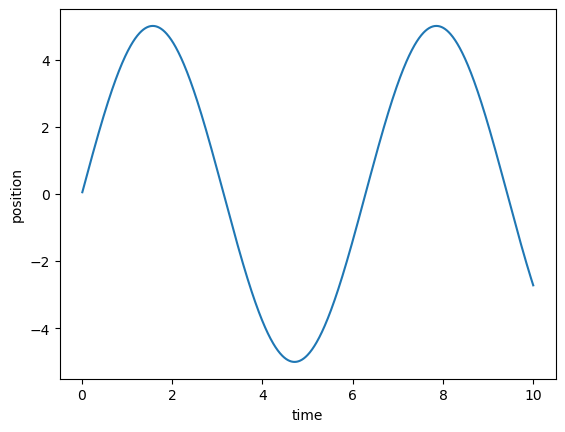

In [21]:
ball1 = phy.Ball(v=5)
phy.motion(t_max=10,num_step=1000,ball=ball1, f_a=lambda x,v,t:-x)
ball1.plot()

---

## reload package after making changes
- import again does not include the changes
- two methods
    1. restart the kernel 
    2. use reload() function in the importlib module

In [5]:
from importlib import reload

In [9]:
reload(phy) #reload takes the nick name of the input

<module 'phys150' from 'C:\\Users\\Shenglong Xu\\Research_git\\phys150\\lecture\\phys150.py'>

## module is self-contained
Functions in a module do not recognize variables and functions outside the module. If the functions in the module requires other packages/modules, one need import those packages in the module.

---

## useful modules/packages
- math (contains common functions and constant)
- random
- numpy (array manipulation, linear algebra, also covers math and random)
- scipy (scientific computation)
- sympy (symbolic calculation)
- pandas (data processing)
- tensorflow, pytorch (machine learning)
- matplotlib (visualization)
- ...
- pygame (making games)